<a href="https://colab.research.google.com/github/younghoonNa/DACON_Predicting-airline-customer-satisfaction./blob/main/DACON_%ED%95%AD%EA%B3%B5%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 시작

In [1]:
# 라이브러리 설치
!pip install gdrive_dataset

In [2]:
!pip3 install catboost
!pip3 install ngboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 
     |████████████████████████████████| 348 kB 23.0 MB/s 
     |████████████████████████████████| 55 kB 1.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=e5ec3d183ddb33eed3627212601f47612128677614497f61861a28c14afa1fe5
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [202]:
!pip install XGBoost

In [278]:
!pip install Extreme Gradient Boosting

     |████████████████████████████████| 237 kB 13.6 MB/s 
ERROR: Could not find a version that satisfies the requirement Boosting (from versions: none)
ERROR: No matching distribution found for Boosting


In [3]:
!pip install pycaret

     |████████████████████████████████| 301 kB 16.3 MB/s 
     |████████████████████████████████| 1.7 MB 48.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 36.8 MB/s 
     |████████████████████████████████| 167 kB 59.9 MB/s 
     |████████████████████████████████| 2.0 MB 15.1 MB/s 
     |████████████████████████████████| 114 kB 38.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 15.6 MB 37.4 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 41.0 MB/s 
     |████████████████████████████████| 261 kB 64.3 MB/s 
     |████████████████████████████████| 303 kB 54.2 MB/s 
     |████████████████████████████████| 675 kB 49.6 MB/s 
     |████████████████████████████████| 636 kB 43.9 MB/s 
     |████████████████

In [4]:
#https://drive.google.com/file/d/1A3_7oKAjZPntGPxTPxSD-kbfrEszy-6l/view?usp=sharing
from gdrivedataset import loader

file_id = "1A3_7oKAjZPntGPxTPxSD-kbfrEszy-6l"
loader.load_from_google_drive(file_id)

========== files ============

data/test.csv
data/sample_submission.csv
data/train.csv



In [5]:
#기본 모듈은 numpy 그리고 pandas 사용.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, Normalizer,RobustScaler, LabelEncoder
from scipy.stats import randint, uniform

#분류/Classifier 사용에 필요한 모델 import 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import seaborn as sns

## 실행

In [475]:
train = pd.read_csv('/content/data/train.csv')
train = train.iloc[: ,1:]
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [476]:
test = pd.read_csv('/content/data/test.csv')
test = test.iloc[: ,1:]
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,Loyal Customer,62,Business travel,Eco Plus,54,3,1,1,1,4,3,4,3,3,3,3,3,3,1,0,0.0
1996,Female,Loyal Customer,33,Business travel,Business,1937,4,4,4,4,3,5,5,5,5,5,5,1,5,3,95,99.0
1997,Male,Loyal Customer,29,Business travel,Eco,2398,3,5,4,4,3,3,3,3,1,2,3,4,2,3,0,3.0
1998,Female,Loyal Customer,51,Personal Travel,Business,406,5,2,5,4,4,3,3,2,2,5,2,2,2,2,87,83.0


In [477]:
sample_submission = pd.read_csv('/content/data/sample_submission.csv')
# train = train.iloc[: ,1:]
sample_submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0


In [478]:
train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [479]:
test.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [480]:
# 중복값 제거
print("제거 전 :", train.shape)
train = train.drop_duplicates()
print("제거 후 :", train.shape)

제거 전 : (3000, 23)
제거 후 : (3000, 23)


In [481]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [482]:
# id : 샘플 아이디
# Gender : 성별
# Customer Type : Disloyal 또는 Loyal 고객
# Age : 나이
# Type of Travel : Business 또는 Personal Travel
# Class : 등급
# Flight Distance : 비행 거리
# Seat comfort : 좌석 만족도
# Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
# Food and drink : 식음료 만족도
# Gate location : 게이트 위치 만족도
# Inflight wifi service : 기내 와이파이 서비스 만족도
# Inflight entertainment : 기내 엔터테인먼트 만족도
# Online support : 온라인 지원 만족도
# Ease of Online booking : 온라인 예매 편리성 만족도
# On-board service : 탑승 서비스 만족도
# Leg room service : Leg room 서비스 만족도
# Baggage handling : 수하물 처리 만족도
# Checkin service : 체크인 서비스 만족도
# Cleanliness : 청결도 만족도
# Online boarding : 온라인보딩 만족도
# Departure Delay in Minutes : 출발 지연 시간
# Arrival Delay in Minutes : 도착 지연 시간
# target : 만족 여부

In [483]:
print("---------Gender---------")
print(train['Gender'].value_counts())
print("---------Customer Type---------")
print(train['Customer Type'].value_counts())
print("---------Type of Travel---------")
print(train['Type of Travel'].value_counts())
print("---------Class---------")
print(train['Class'].value_counts())

---------Gender---------
Male      1502
Female    1498
Name: Gender, dtype: int64
---------Customer Type---------
Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64
---------Type of Travel---------
Business travel    2053
Personal Travel     947
Name: Type of Travel, dtype: int64
---------Class---------
Business    1434
Eco         1337
Eco Plus     229
Name: Class, dtype: int64


In [484]:
train[train.columns[train.dtypes=='O']] = train[train.columns[train.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,30,1,1,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,0,1,24,0,1,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,0,1,22,0,1,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,0,1,33,0,0,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [485]:
test[test.columns[test.dtypes=='O']] = test[test.columns[test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,61,1,1,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,0,1,27,0,0,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,0,0,52,0,0,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,1,0,54,0,0,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,0,0,41,0,1,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,62,0,2,54,3,1,1,1,4,3,4,3,3,3,3,3,3,1,0,0.0
1996,0,0,33,0,0,1937,4,4,4,4,3,5,5,5,5,5,5,1,5,3,95,99.0
1997,1,0,29,0,1,2398,3,5,4,4,3,3,3,3,1,2,3,4,2,3,0,3.0
1998,0,0,51,1,0,406,5,2,5,4,4,3,3,2,2,5,2,2,2,2,87,83.0


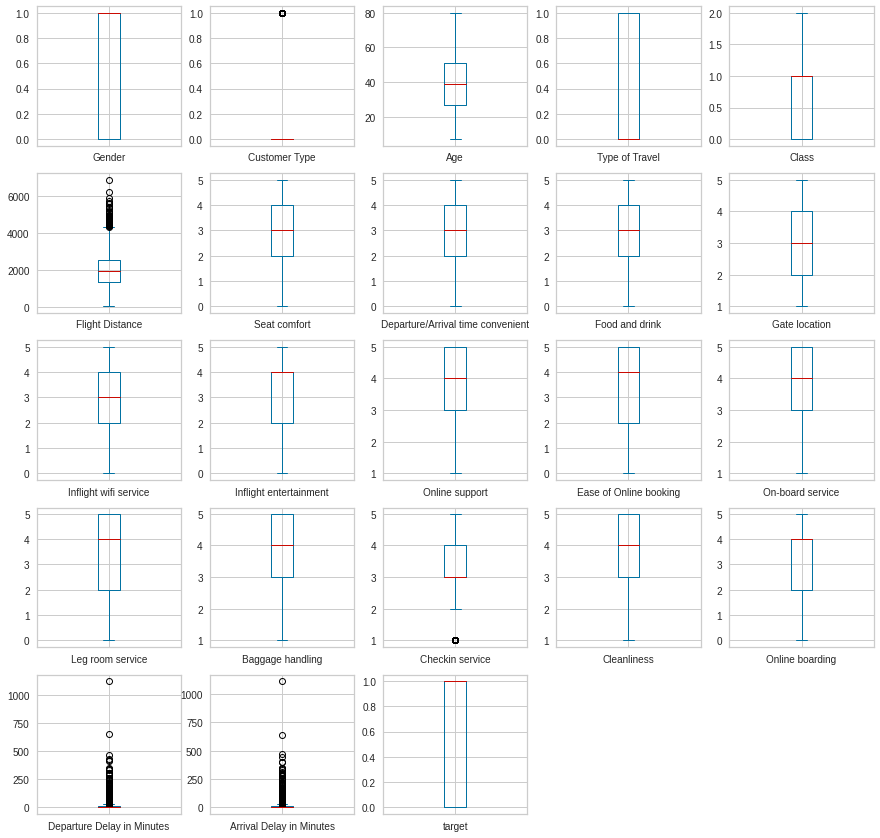

In [486]:
# 각 컬럼별 BoxPlot
train.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

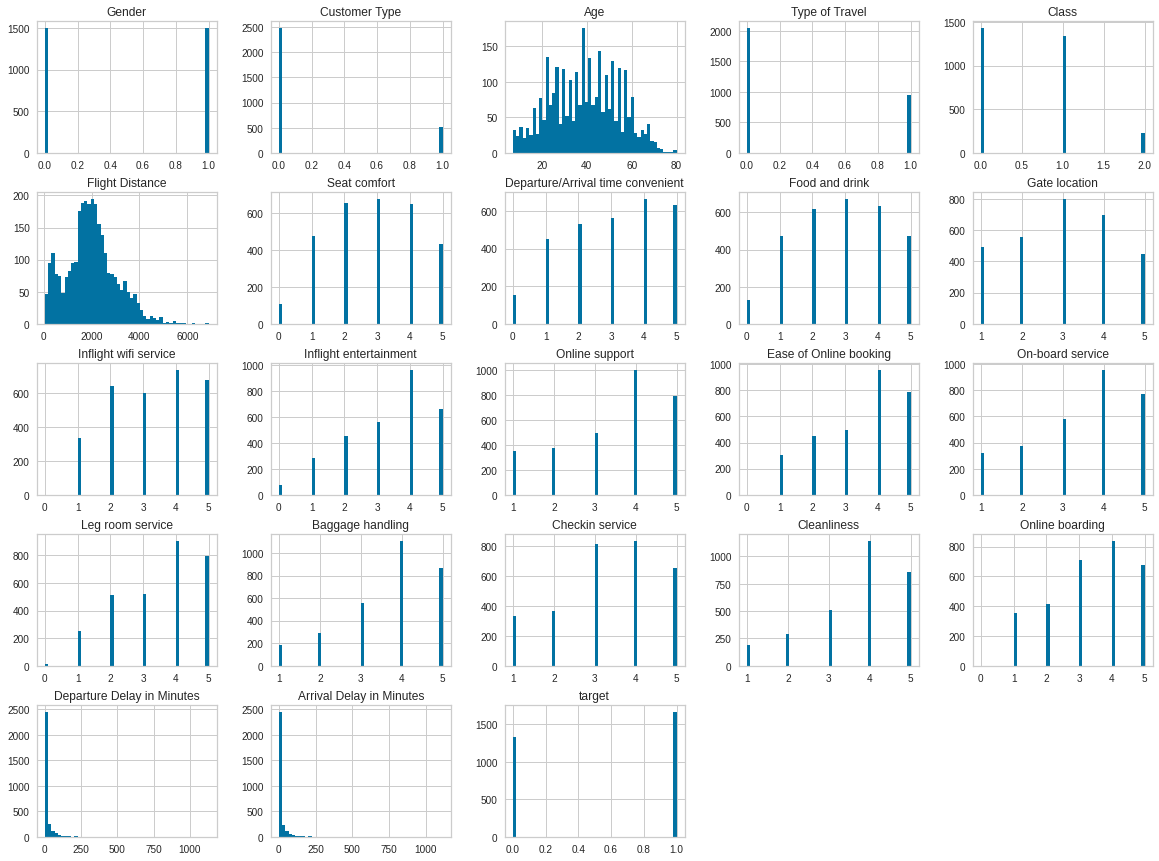

In [487]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [488]:
features = [
  'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'target'
 ]

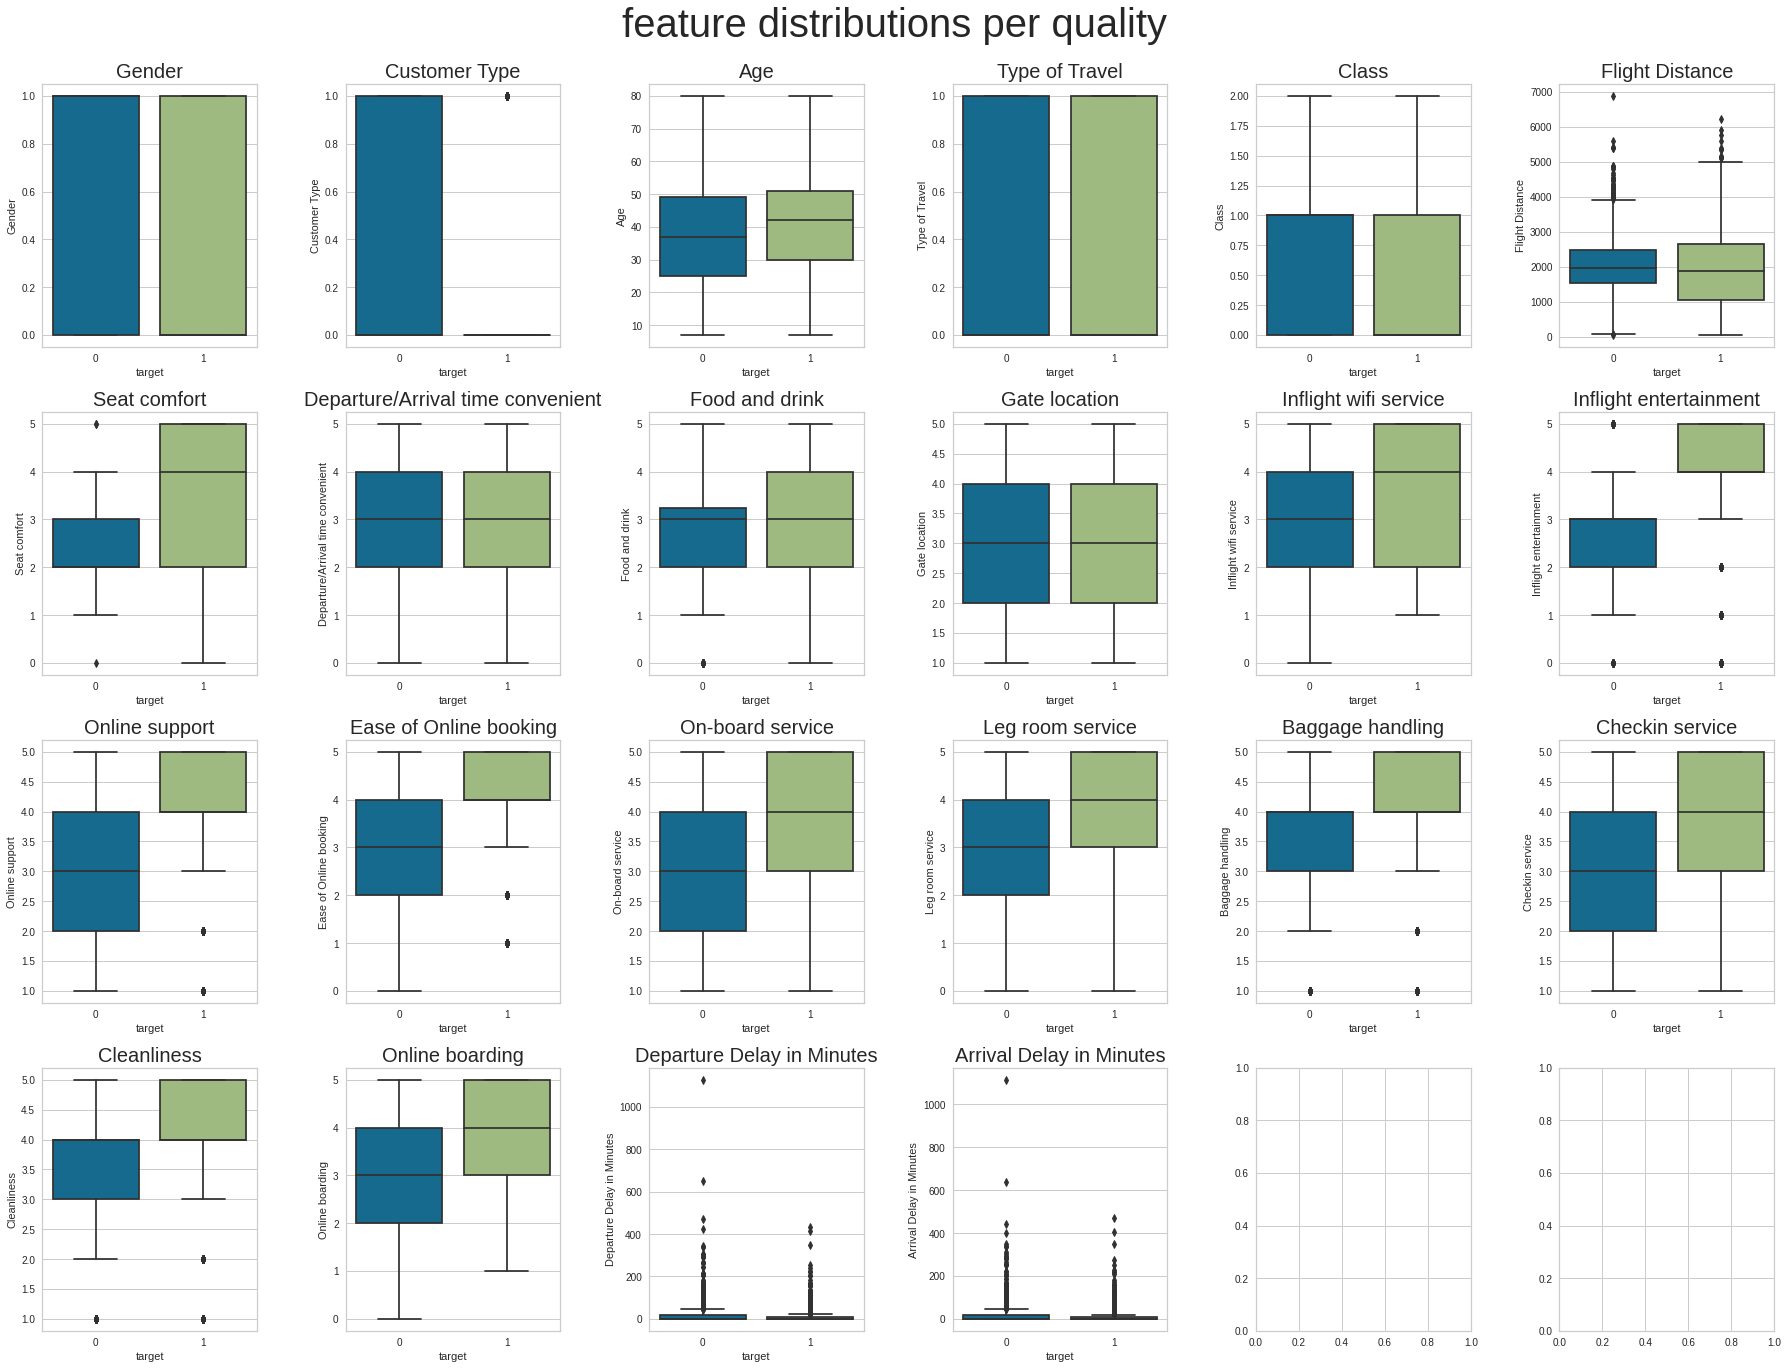

In [489]:
# 박스플롯
fig, axes = plt.subplots(4, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, features[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [490]:
feature = [
  'Gender',
 'Customer Type',
#  'Age',
 'Type of Travel',
 'Class',
#  'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
#  'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
#  'Departure Delay in Minutes',
#  'Arrival Delay in Minutes',
 'target'
 ]

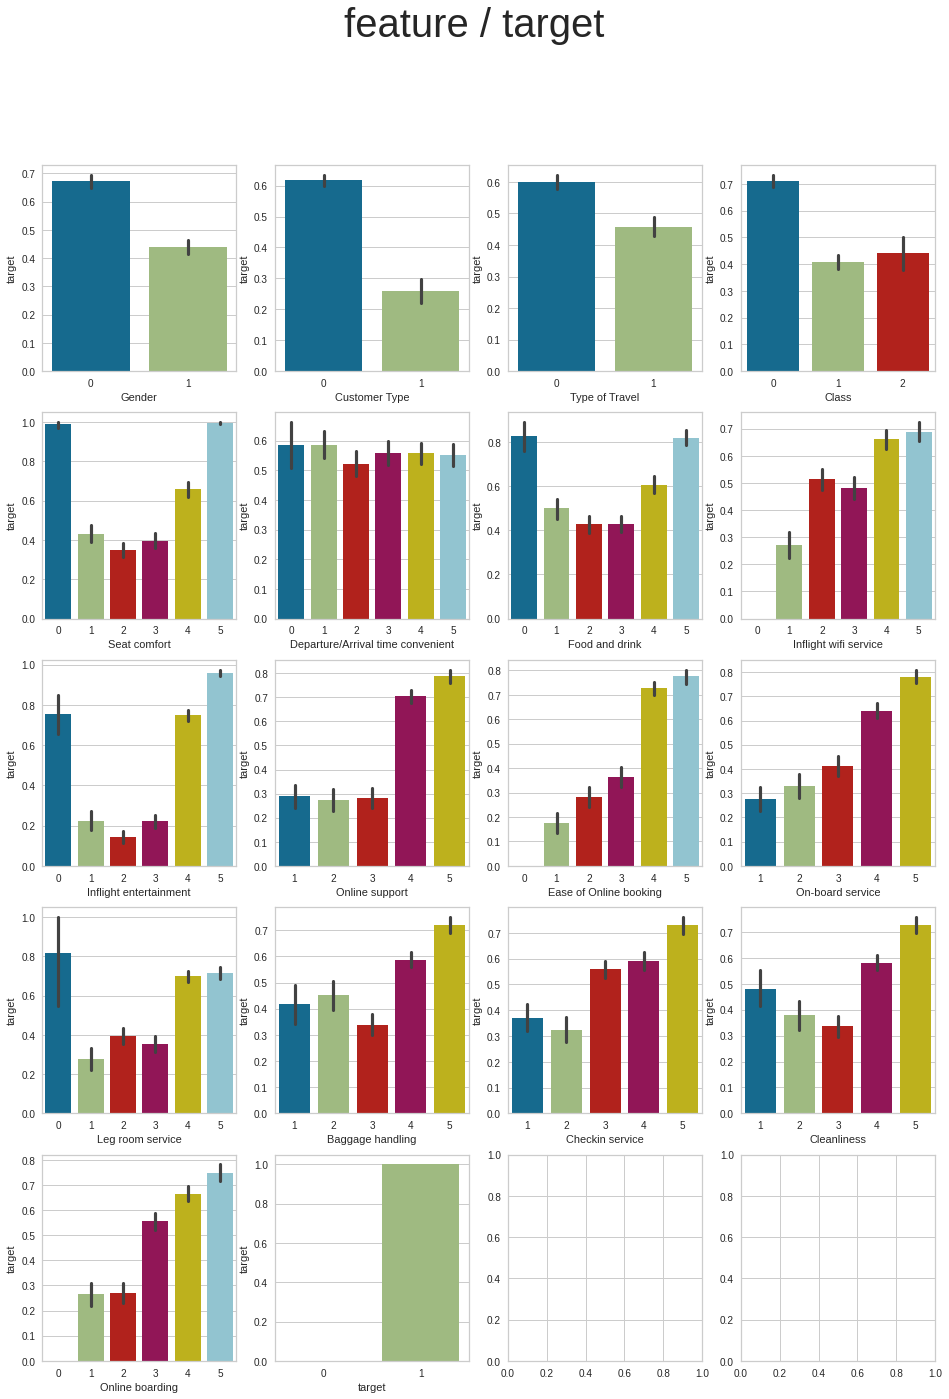

In [491]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

## ㄴ

In [492]:
train.loc[train['Seat comfort'] == 0, 'target'].value_counts()

1    105
0      1
Name: target, dtype: int64

In [493]:
train.loc[train['Inflight wifi service'] == 0, 'target']

2154    0
2171    0
Name: target, dtype: int64

In [494]:
train.loc[train['Seat comfort'] == 0, 'Seat comfort'] = 4
test.loc[test['Seat comfort'] == 0, 'Seat comfort'] = 4

In [495]:
train.loc[train['Food and drink'] == 0, 'target'].value_counts()

1    107
0     22
Name: target, dtype: int64

In [496]:
train.loc[train['Food and drink'] == 0, 'Food and drink'] = 4
test.loc[test['Food and drink'] == 0, 'Food and drink'] = 4

In [497]:
train.loc[train['Inflight wifi service'] == 0, 'Inflight wifi service'] = 0
test.loc[test['Inflight wifi service'] == 0, 'Inflight wifi service'] = 0

In [498]:
train.loc[train['Inflight entertainment'] == 0, 'Inflight entertainment'] = train.loc[train['Inflight entertainment'] != 0, 'Inflight entertainment'].median()
test.loc[test['Inflight entertainment'] == 0, 'Inflight entertainment'] = test.loc[test['Inflight entertainment'] != 0, 'Inflight entertainment'].median()

In [499]:
train.loc[train['Ease of Online booking'] == 0, 'Ease of Online booking'] = train.loc[train['Ease of Online booking'] != 0, 'Ease of Online booking'].mean()

In [500]:
train.loc[train['Leg room service'] == 0, 'Leg room service'] = train.loc[train['Leg room service'] != 0, 'Leg room service'].median()
test.loc[test['Leg room service'] == 0, 'Leg room service'] = test.loc[train['Leg room service'] != 0, 'Leg room service'].median()

In [501]:
train.loc[train['Online boarding'] == 0, 'Online boarding'] = train.loc[train['Online boarding'] != 0, 'Online boarding'].mean()

In [502]:
train.loc[train['Departure/Arrival time convenient'] == 0, 'Departure/Arrival time convenient'] = train.loc[train['Departure/Arrival time convenient'] != 0, 'Departure/Arrival time convenient'].median()
test.loc[test['Departure/Arrival time convenient'] == 0, 'Departure/Arrival time convenient'] = test.loc[test['Departure/Arrival time convenient'] != 0, 'Departure/Arrival time convenient'].median()

In [503]:
train['Delayed'] = (train['Departure Delay in Minutes'] 
                         + train['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
test['Delayed'] = (test['Departure Delay in Minutes'] 
                         + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [504]:
train['delayMinute'] = (train['Departure Delay in Minutes'] + train['Arrival Delay in Minutes'] ) / 2
test['delayMinute'] = (test['Departure Delay in Minutes'] + test['Arrival Delay in Minutes'] ) / 2

In [505]:
train['Online_service'] = train['Ease of Online booking'] + train['Online boarding'] + train['Online support']
test['Online_service'] = test['Ease of Online booking'] + test['Online boarding'] + test['Online support']

In [506]:
# train['one'] = (train['Seat comfort'] + train['Food and drink'] + train['Seat comfort'] + train['Gate location'] + train['Inflight wifi service'] + train['Inflight entertainment'] + train['Baggage handling']
#                          + train['Departure/Arrival time convenient'] + train['Online support'] + train['Ease of Online booking'] + train['On-board service'] + train['Leg room service'] 
#                 + train['Checkin service'] + train['Cleanliness'] + train['Online boarding']
#                 ).apply(lambda x : 0 if x > 29 else 1)


# # test['Delayed'] = (test['Departure Delay in Minutes'] 
# #                          + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [507]:
def age_(x):
  return int(x/10)

train['age_ten'] = train['Age'].apply(age_)
test['age_ten'] = test['Age'].apply(age_)


# test['Delayed'] = (test['Departure Delay in Minutes'] 
#                          + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [508]:
train = train.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Food and drink', 'Ease of Online booking', 'Online boarding', 'Online support', 'Age'], axis = 1)
test = test.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Food and drink', 'Ease of Online booking', 'Online boarding', 'Online support', 'Age'], axis = 1)

In [350]:
train = train.drop(['one', 'Bag'], axis =1)

## skew

In [509]:
numeric_feature = [
    'Flight Distance',
    # 'Age',
    'delayMinute',
    # 'Departure Delay in Minutes',
    # 'Arrival Delay in Minutes',
]

In [510]:
for xstr in numeric_feature:
    print(xstr, "Scew :", train[xstr].skew())

Flight Distance Scew : 0.4509930169224059
delayMinute Scew : 9.167896002207332


In [511]:
train['delayMinute'] = np.log1p(train['delayMinute'])
test['delayMinute'] = np.log1p(test['delayMinute'])

print("Scew :", train['delayMinute'].skew())

Scew : 0.8401213891584359


## Heat map

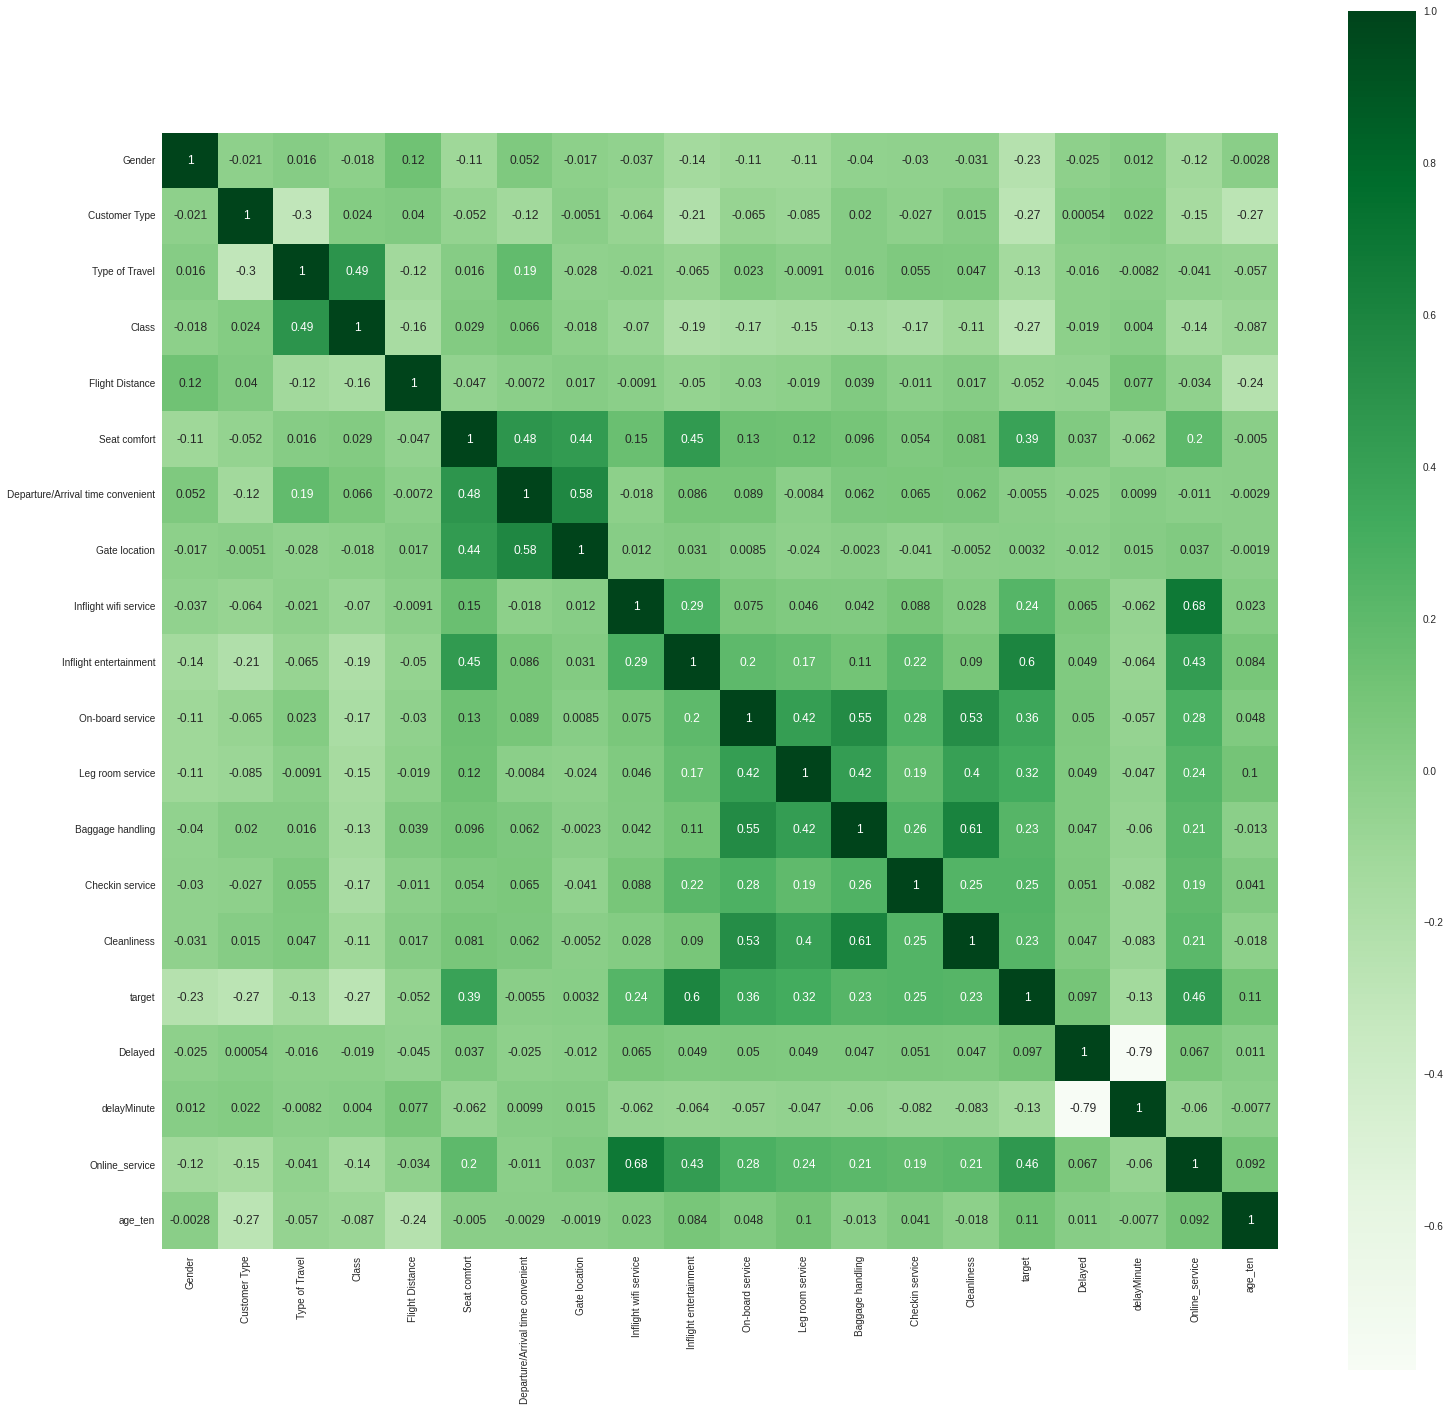

In [512]:
plt.subplots(figsize=(25,25))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

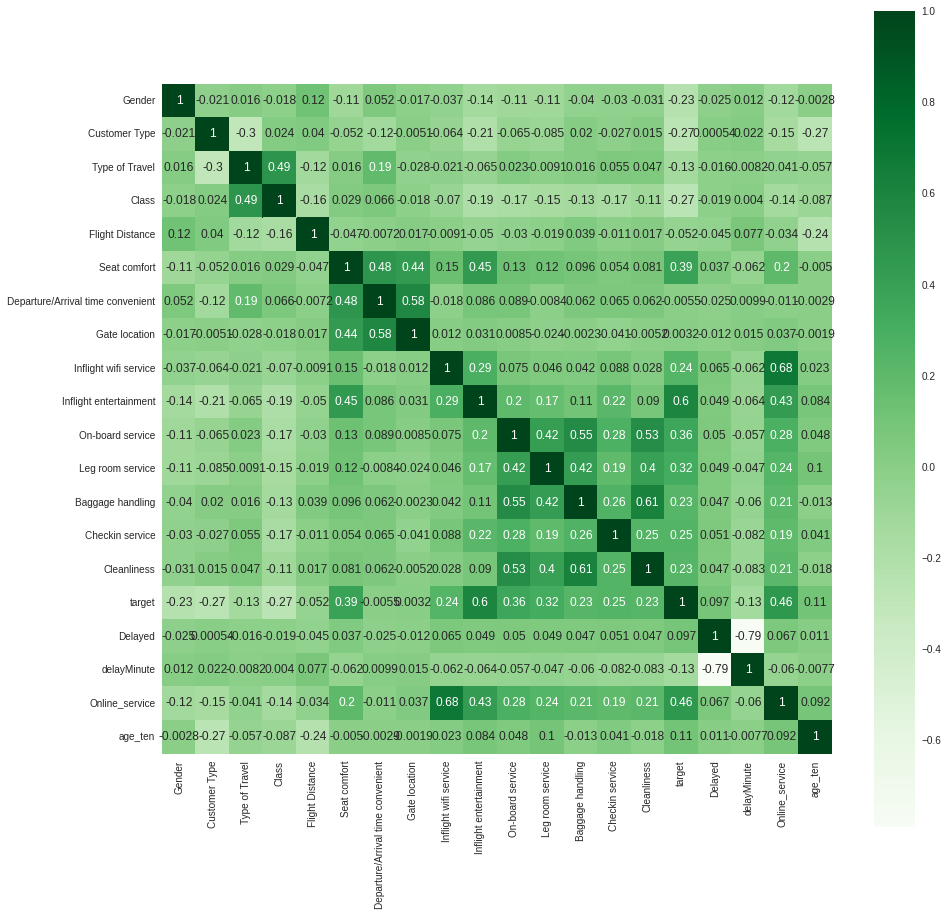

In [513]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [514]:
# train 및 test 데이터 분할
# x_train, x_test, y_train, y_test = train_test_split(train,test, random_state=42, test_size=0.1)

In [515]:
num_cols = train.select_dtypes(exclude='object').columns.to_list()
num_cols

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'target',
 'Delayed',
 'delayMinute',
 'Online_service',
 'age_ten']

In [516]:
train = train.astype('float')
test = test.astype('float')

In [517]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   float64
 1   Customer Type                      3000 non-null   float64
 2   Type of Travel                     3000 non-null   float64
 3   Class                              3000 non-null   float64
 4   Flight Distance                    3000 non-null   float64
 5   Seat comfort                       3000 non-null   float64
 6   Departure/Arrival time convenient  3000 non-null   float64
 7   Gate location                      3000 non-null   float64
 8   Inflight wifi service              3000 non-null   float64
 9   Inflight entertainment             3000 non-null   float64
 10  On-board service                   3000 non-null   float64
 11  Leg room service                   3000 non-null   float

In [518]:


# for i in train[featurs]:
#     scaler = StandardScaler()
#     train_scaled=scaler.fit_transform(train[featurs])
#     train[featurs] = pd.DataFrame(data=train_scaled, columns=featurs)
#     test_scaled=scaler.transform(test[featurs])
#     test[featurs] = pd.DataFrame(data=test_scaled, columns=featurs)

In [519]:
from pycaret.classification import *

setup_ = setup(data = train, use_gpu = True, target = 'target', n_jobs = -1, train_size = 0.9, feature_interaction = True, feature_ratio = True, silent = True)
#Slient를 사용하면 엔터 안쳐줘두 댐

,Description,Value
0,session_id,8054
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3000, 20)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [523]:
best3 = compare_models(n_select = 3, sort = 'Accuracy', fold = 10)
best3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9293,0.9819,0.9376,0.9360,0.9367,0.8565,0.8568,0.178
catboost,CatBoost Classifier,0.9263,0.9817,0.9402,0.9291,0.9345,0.8502,0.8507,3.023
rf,Random Forest Classifier,0.9156,0.9737,0.9356,0.9156,0.9252,0.8282,0.8291,1.338
gbc,Gradient Boosting Classifier,0.9156,0.9772,0.9283,0.9215,0.9246,0.8286,0.8293,0.815
et,Extra Trees Classifier,0.9111,0.9729,0.9236,0.9184,0.9207,0.8196,0.8203,1.304
ada,Ada Boost Classifier,0.9056,0.9679,0.9230,0.9102,0.9162,0.8080,0.8089,0.302
qda,Quadratic Discriminant Analysis,0.8907,0.9536,0.9289,0.8822,0.9047,0.7768,0.7789,0.034
ridge,Ridge Classifier,0.8867,0.0000,0.9150,0.8864,0.9001,0.7692,0.7705,0.032
lda,Linear Discriminant Analysis,0.8856,0.9508,0.9150,0.8848,0.8993,0.7668,0.7683,0.045
lr,Logistic Regression,0.8815,0.9499,0.9070,0.8843,0.8951,0.7589,0.7603,2.497


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=8054, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=8054, verbose=0,
                     

## Fin

In [524]:
blend = blend_models(estimator_list= best3 , fold=10, optimize='Accuracy', method='soft', choose_better=True) #voting regressor로 블렌딩합니다.
pred_holdout = predict_model(blend)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9444,0.9780,0.9536,0.9474,0.9505,0.8872,0.8872
1,0.8889,0.9686,0.9272,0.8805,0.9032,0.7730,0.7744
2,0.9407,0.9885,0.9470,0.9470,0.9470,0.8798,0.8798
3,0.9333,0.9850,0.9603,0.9236,0.9416,0.8640,0.8649
4,0.9370,0.9839,0.9470,0.9408,0.9439,0.8722,0.8722
5,0.9444,0.9874,0.9470,0.9533,0.9502,0.8874,0.8874
6,0.9074,0.9673,0.9133,0.9195,0.9164,0.8127,0.8127
7,0.9370,0.9806,0.9533,0.9346,0.9439,0.8722,0.8724
8,0.9333,0.9878,0.9333,0.9459,0.9396,0.8652,0.8653
9,0.9259,0.9803,0.9267,0.9392,0.9329,0.8502,0.8503


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9567,0.9829,0.9691,0.9515,0.9602,0.9126,0.9128


In [50]:
# best model 5
# 0.9433	0.9394	0.9653	0.9382	0.9516	0.8833	0.8838

# Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
# 0	Voting Classifier	0.9533	0.9848	0.9595	0.9595	0.9595	0.9044	0.9044

In [51]:
# lgbm = create_model('lightgbm')
# tuned_lgbm= tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9680,0.9333,0.8917,0.9121,0.7963,0.7974
1,0.9370,0.9859,0.9600,0.9290,0.9443,0.8720,0.8726
2,0.9370,0.9809,0.9400,0.9463,0.9431,0.8726,0.8726
3,0.9259,0.9704,0.9467,0.9221,0.9342,0.8495,0.8499
4,0.8630,0.9568,0.8926,0.8636,0.8779,0.7219,0.7224
5,0.9296,0.9769,0.9262,0.9452,0.9356,0.8581,0.8583
6,0.9222,0.9724,0.8926,0.9638,0.9268,0.8441,0.8469
7,0.9296,0.9794,0.9396,0.9333,0.9365,0.8576,0.8576
8,0.9222,0.9713,0.9262,0.9324,0.9293,0.8429,0.8429
9,0.9148,0.9818,0.9463,0.9038,0.9246,0.8268,0.8280


In [525]:
final_model = finalize_model(blend)
pred= predict_model(final_model, test)
pred

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Delayed,delayMinute,Online_service,age_ten,Label,Score
0,0.0,0.0,1.0,1.0,2037.0,1.0,1.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,0.0,4.016383,13.0,6.0,1.0,0.9959
1,0.0,1.0,0.0,0.0,1846.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,5.0,4.0,4.0,1.0,0.000000,3.0,2.0,0.0,0.9955
2,0.0,0.0,0.0,0.0,1622.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,1.0,0.000000,12.0,5.0,1.0,0.9631
3,1.0,0.0,0.0,0.0,3534.0,4.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,5.0,2.0,1.0,0.000000,8.0,5.0,1.0,0.9038
4,0.0,0.0,0.0,1.0,1471.0,4.0,3.0,3.0,4.0,4.0,3.0,1.0,2.0,5.0,4.0,1.0,0.000000,12.0,4.0,1.0,0.9505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,2.0,54.0,3.0,1.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0.000000,8.0,6.0,0.0,0.8781
1996,0.0,0.0,0.0,0.0,1937.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,1.0,5.0,0.0,4.584967,13.0,3.0,1.0,0.9915
1997,1.0,0.0,0.0,1.0,2398.0,3.0,5.0,4.0,3.0,3.0,1.0,2.0,3.0,4.0,2.0,0.0,0.916291,9.0,2.0,0.0,0.9952
1998,0.0,0.0,1.0,0.0,406.0,5.0,2.0,4.0,4.0,3.0,2.0,5.0,2.0,2.0,2.0,0.0,4.454347,7.0,5.0,1.0,0.8804


In [526]:
# final_model = finalize_model(blend)
# pred= predict_model(final_model, test)
# pred

In [527]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2000 non-null   int64
 1   target  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


In [528]:
sample_submission['target'] = pred['Label']
sample_submission

,id,target
0,1,1.0
1,2,0.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
1995,1996,0.0
1996,1997,1.0
1997,1998,0.0
1998,1999,1.0


In [529]:
sample_submission = sample_submission.astype({'target':'float'})
sample_submission = sample_submission.astype({'target':'int'})
sample_submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [531]:
sample_submission.to_csv("seven_airplane.csv",index=False)